In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/yellow_tripdata_2016-01.csv', usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance'], engine='pyarrow')

In [3]:
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [4]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,dropoff_datetime,pickup_datetime
0,2016-01-01,2016-01-01,2,1.10,2016-01-01,2016-01-01
1,2016-01-01,2016-01-01,5,4.90,2016-01-01,2016-01-01
2,2016-01-01,2016-01-01,1,10.54,2016-01-01,2016-01-01
3,2016-01-01,2016-01-01,1,4.75,2016-01-01,2016-01-01
4,2016-01-01,2016-01-01,3,1.76,2016-01-01,2016-01-01


In [5]:
df['passenger_count'].value_counts().sort_index()

passenger_count
0        520
1    7726984
2    1561977
3     436431
4     210641
5     601079
6     369155
7         22
8         26
9         23
Name: count, dtype: int64

In [6]:
df['duration'] = df['dropoff_datetime'] - df['pickup_datetime']


In [20]:
len(df[df['duration'] < '0'])

31

In [36]:
(df['duration']>'1 days').sum()

18

In [45]:
df['dropoff_datetime'].sort_values()

0          2016-01-01 00:00:00
1          2016-01-01 00:00:00
2          2016-01-01 00:00:00
3          2016-01-01 00:00:00
4          2016-01-01 00:00:00
                   ...        
10906421   2016-02-11 15:06:37
10906419   2016-02-12 11:42:29
8042554    2016-03-01 14:58:26
10906855   2016-03-19 20:45:50
10906856   2016-03-28 12:54:26
Name: dropoff_datetime, Length: 10906858, dtype: datetime64[ns]

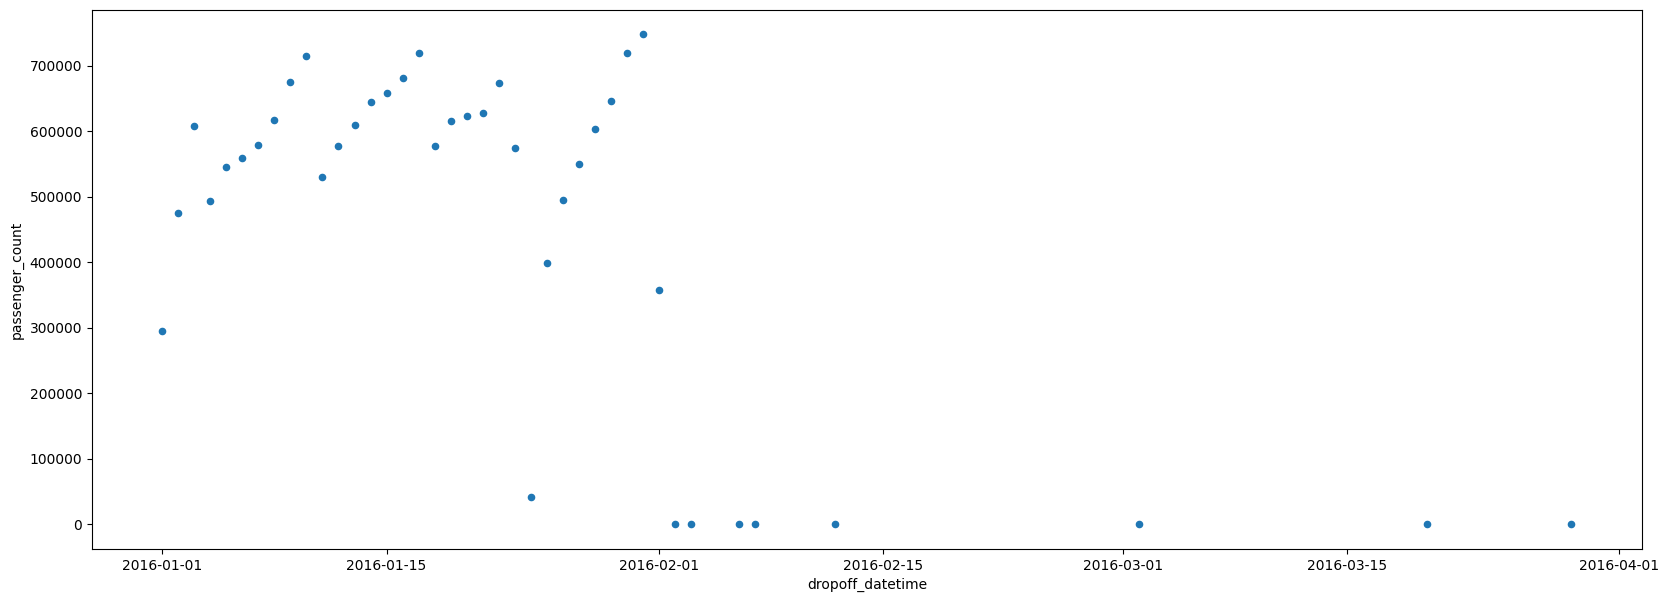

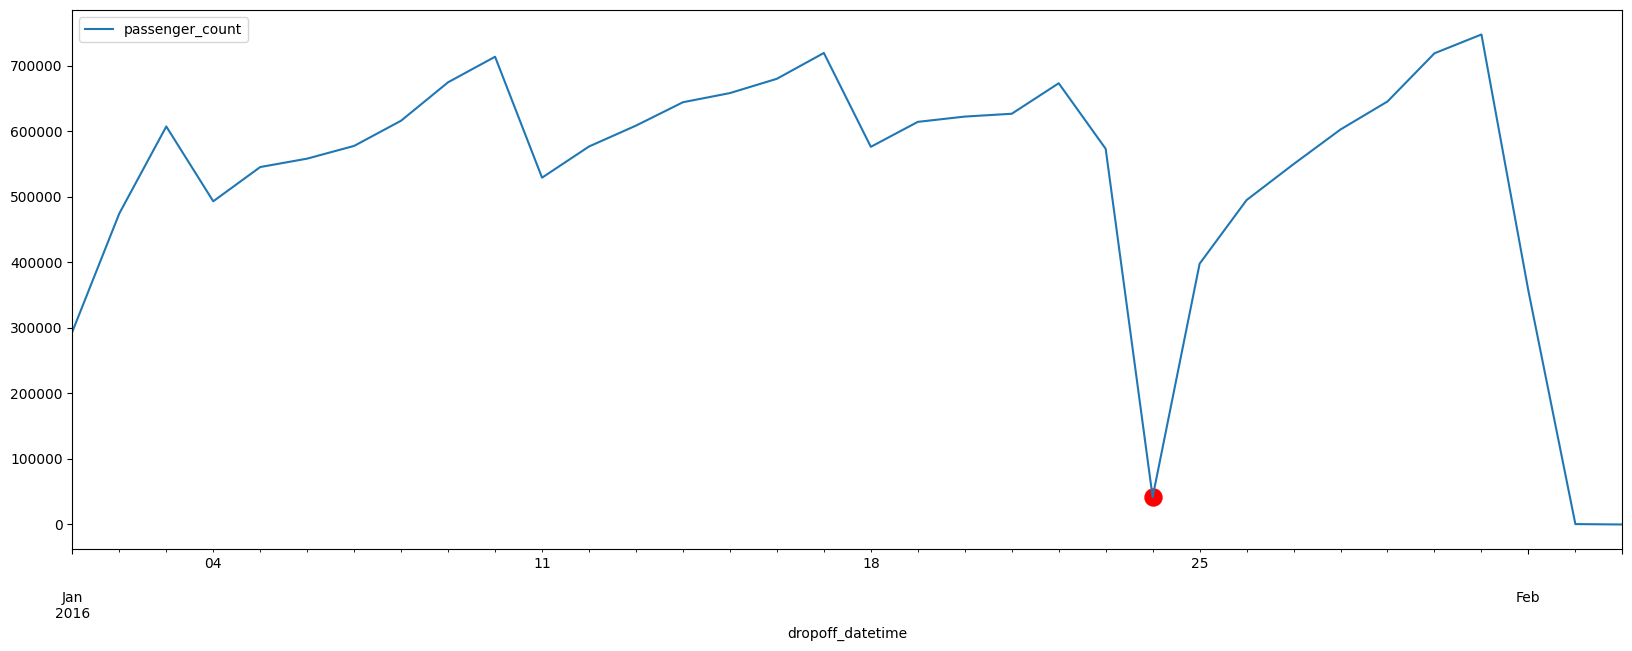

In [56]:
df_dates = df[["dropoff_datetime", "passenger_count"]].copy()
df_dates["dropoff_datetime"] = df_dates["dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="dropoff_datetime").sum().reset_index()

df_dates.plot.scatter(x="dropoff_datetime", y="passenger_count", figsize=(20, 7))
df_dates = df_dates[df_dates['dropoff_datetime'] < '2016-02-04']
ax = df_dates.plot(x="dropoff_datetime", y="passenger_count", figsize=(20, 7))
ax.scatter(['2016-01-24'], [41767], s=150, c='r')

<Axes: xlabel='dropoff_datetime'>

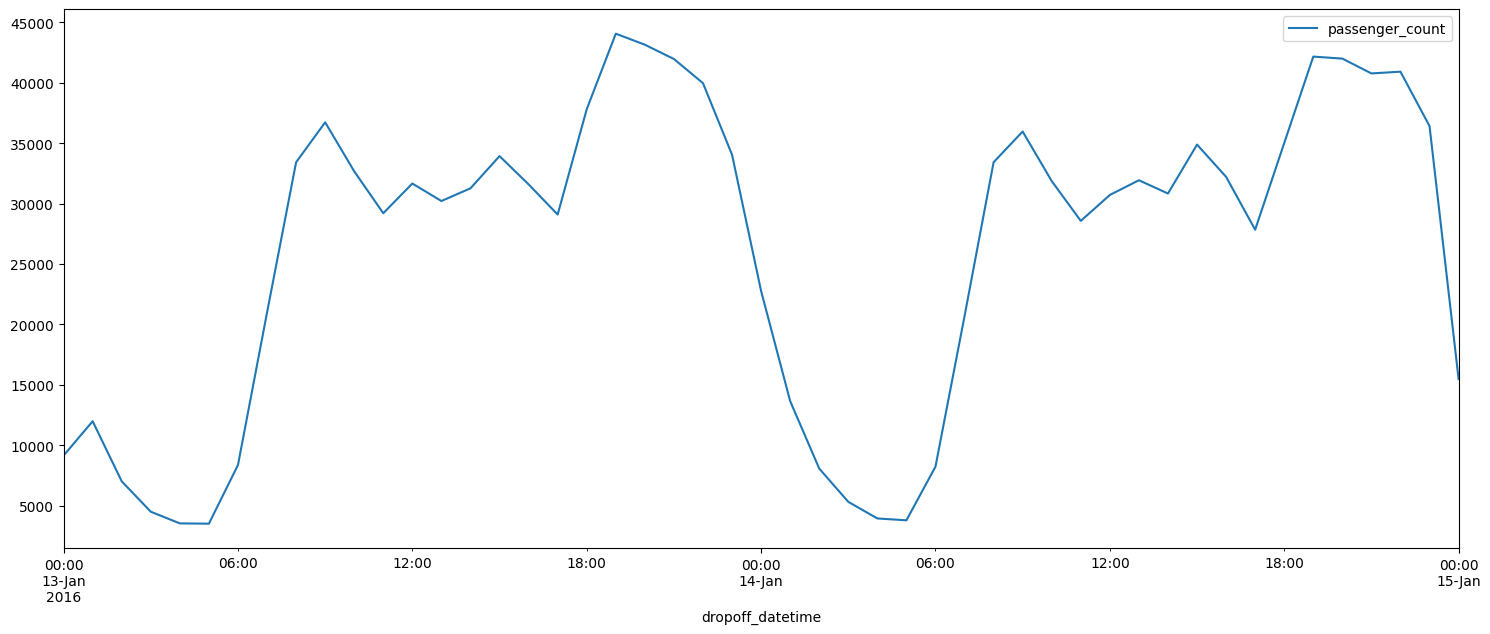

In [57]:
df_hour = df[["dropoff_datetime", "passenger_count"]][(df['dropoff_datetime'] < '2016-01-15') & (df['dropoff_datetime'] > '2016-01-13')]
df_hour["dropoff_datetime"] = df_hour["dropoff_datetime"].dt.round('H')
df_hour.groupby(by="dropoff_datetime").sum().reset_index().plot(x="dropoff_datetime", y="passenger_count", figsize=(18, 7))